## Premier test avec Python ##

Le code ci-dessous permet de comparer les résultats obtenus via Python à ceux obtenus avec C++.

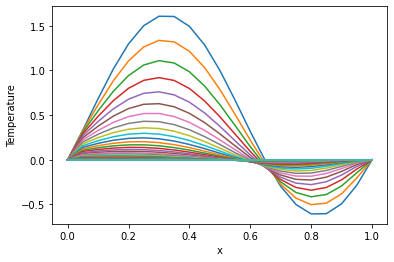

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def euler_explicite(f,dt,T,x0,t0):
    xs, ts = [x0], [t0]
    while ts[-1] < T:
        xs.append(xs[-1] + dt * f(xs[-1]))
        ts.append(ts[-1] + dt)
    return (ts, xs)

dx = 1/20
x = np.array([i * dx for i in range(21)])
n = len(x)
T0 = 1/2 + np.sin(2 * np.pi * x) - 1/2 * np.cos(2 * np.pi * x)

def d(x):
    return 1

d = np.vectorize(d)

D = d(x)

K = np.zeros((n,n))
for i in range(n):
    if i+1 < n:
        K[i,i] = -(D[i] + D[i+1])/(dx**2)
        K[i,i+1] = D[i+1]/(dx**2)
    elif i - 1 >= 0:
        K[i,i-1] = D[i]/(dx**2)
K[0,:] = 0
K[n-1,:] = 0
K[0,0] = -2/(dx**2)
K[n-1,n-1] = - 2/(dx**2)
        
def f(T):
    return np.dot(K,T)

def euler_implicite(dt,T,x0,t0):
    xs, ts = [x0], [t0]
    while ts[-1] < T:
        xs.append(np.linalg.solve(np.identity(n) - dt * K,xs[-1]))
        ts.append(ts[-1] + dt)
    return (ts, xs)

ts, xs = euler_implicite(0.5/1001,0.5,T0,0)

for i in range(1000):
    plt.plot(x,xs[i][:])
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()

## Résultats de la question 2 ##

Dans la cellule suivante, on traite les résultats de la question 2 i.e. la solution obtenue via **Euler explicite** pour une conductivité constante égale à 1 (C++).

A l'aide du module chrono de la librarie standard, on obtient un temps de 75514 μs pour la résolution numérique de l'équation différentielle avec nx = 21 et nt = 1001.

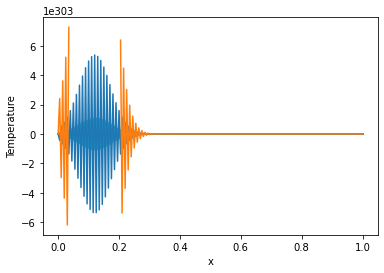

In [4]:
nx = 21
nt = 1001
dx = 1.0/(nx-1)
dt = 0.5/(nt-1)
x = np.array([i * dx for i in range(21)])

arr = np.loadtxt("Q2.txt")

for i in range(1000):
    plt.plot(x,arr[i][:])
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()

## Résultats de la question 4 ##

Dans la cellule suivante, on traite les résultats de la question 4 i.e. la solution obtenue via **Euler implicite** pour une conductivité constante égale à 1 (C++).

Pour nx = 21, nt = 1001, on a un temps d'exécution de 233342 μs.

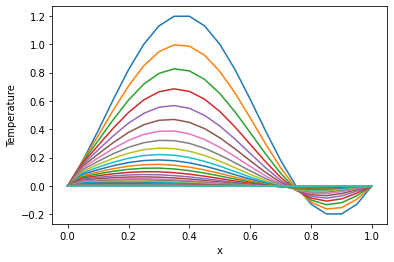

In [14]:
arr1 = np.loadtxt("Q3_4.txt")

for i in range(1000):
    plt.plot(x,arr1[i][:])
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()

## Résultats de la question bonus 1 (Euler explicite) ##

Dans la cellule suivante, on traite les résultats de la question bonus 1 (explicite) i.e. la solution obtenue via Euler explicite pour une conductivité "aléatoire" de valeurs entre 0.5 et 1.5 SI (C++).

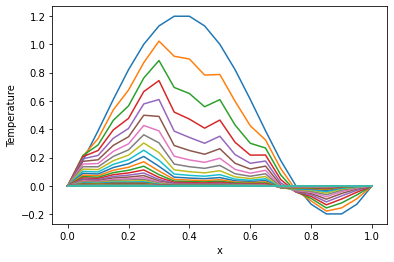

In [13]:
arr2 = np.loadtxt("QBonus1_explicite.txt")

for i in range(1000):
    plt.plot(x,arr2[i][:])
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()

## Résultats de la question bonus 1 (Euler implicite) ##

Dans la cellule suivante, on traite les résultats de la question bonus 1 (implicite) i.e. la solution obtenue via Euler implicite pour une conductivité "aléatoire" de valeurs entre 0.5 et 1.5 SI (C++).

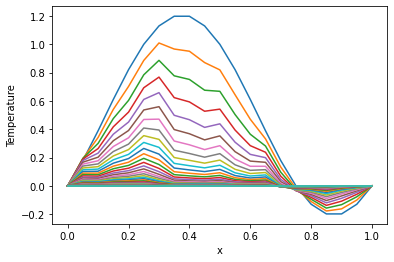

In [12]:
arr3 = np.loadtxt("QBonus1_implicite.txt")

for i in range(1000):
    plt.plot(x,arr3[i][:])
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()

## Résultats de la question bonus 2 (Euler explicite) ##

On utilise la librarie externe Eigen pour implémenter les matrices creuses, et on refait le calcul de la question 2. Pour nx = 21, nt = 1001, temps d'exécution de 45758 μs. On constate que cette valeur est inférieure à celle obtenue avec les matrices habituelles.

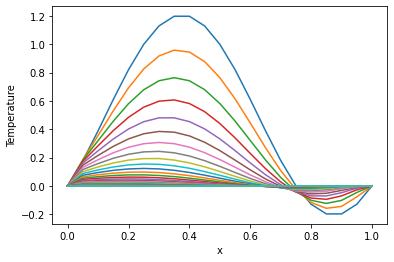

In [10]:
arr4 = np.loadtxt("QBonus2_explicite.txt")

for i in range(1000):
    plt.plot(x,arr4[i][:])
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()

## Résultats de la question bonus 2 (Euler implicite)

On utilise la librarie externe Eigen pour implémenter les matrices creuses. Pour nx = 21, nt = 1001, temps d'exécution de 99018 μs. On remarque une amélioration nette du temps d'exécution pour la méthode d'Euler implicite, par rapport à l'implémentation habituelle via des matrices denses.

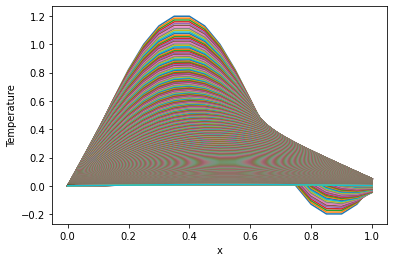

In [9]:
arr5 = np.loadtxt("QBonus2_implicite.txt")

for i in range(1000):
    plt.plot(x,arr5[i][:])
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()

## Résultat théorique ##

Résultat théorique en passant par les séries de Fourier (recherche de solutions à variables séparées). Valable pour le problème avec conductivité constante égale à 1.

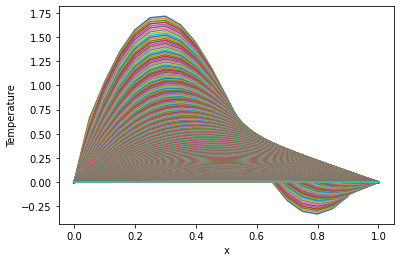

In [40]:
def h(x,t):
    S = (2/np.pi) * np.exp(-np.pi**2 * t) * np.sin(np.pi * x) + np.exp(-4 * np.pi**2 * t) * np.sin(2 * np.pi * x)
    for k in range(100):
        S += (np.exp(-(2 * k + 1)**2 * np.pi**2 * t) * np.sin((2 * k + 1) * np.pi * x))/((2 * k + 1) * np.pi)
    return S

def j(i):
    def k(x):
        return h(x,i*0.5/1001)
    return k

for i in range(1000):
    plt.plot(x,j(i)(x))
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()